<a href="https://colab.research.google.com/github/sanashk19/Sana_PriceOptima/blob/main/Sana_PriceOptima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
dataset= pd.read_csv('/content/drive/MyDrive/dynamic_pricing.csv')
dataset.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
dataset.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [ ]:
dataset.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [ ]:
dataset.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
dataset.shape

(1000, 10)

In [ ]:
dataset.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [ ]:
dataset.nunique()

,0
Number_of_Riders,81
Number_of_Drivers,79
Location_Category,3
Customer_Loyalty_Status,3
Number_of_Past_Rides,101
Average_Ratings,151
Time_of_Booking,4
Vehicle_Type,2
Expected_Ride_Duration,171
Historical_Cost_of_Ride,1000


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [3]:
print("Duplicates:", dataset.duplicated().sum())
dataset = dataset.drop_duplicates()

Duplicates: 0


In [4]:
#Handling missing values
for col in dataset.columns:
    if dataset[col].dtype in ['int64', 'float64']:   # numeric
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:                                            # categorical
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
print("Missing values per column after preprocessing:")
print(dataset.isnull().sum())


Missing values per column after preprocessing:
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


In [5]:
print(dataset.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [6]:
import numpy as np

# Function to detect outliers using IQR
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)   # 25th percentile
    Q3 = data[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                   # Interquartile range

    lower = Q1 - 1.5 * IQR           # Lower bound
    upper = Q3 + 1.5 * IQR           # Upper bound

    # Outliers are those outside the bounds
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    return outliers, lower, upper

# Apply to all numerical columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers, lower, upper = find_outliers_iqr(dataset, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")

    # Show example outlier values
    if not outliers.empty:
        print("Example Outliers:\n", outliers[[col]].head())


Column: Number_of_Riders
Lower Bound: -21.5, Upper Bound: 142.5
Number of Outliers: 0

Column: Number_of_Drivers
Lower Bound: -29.5, Upper Bound: 78.5
Number of Outliers: 10
Example Outliers:
      Number_of_Drivers
42                  81
53                  84
140                 80
294                 80
663                 87

Column: Number_of_Past_Rides
Lower Bound: -50.0, Upper Bound: 150.0
Number of Outliers: 0

Column: Average_Ratings
Lower Bound: 2.72625, Upper Bound: 5.776250000000001
Number of Outliers: 0

Column: Expected_Ride_Duration
Lower Bound: -65.125, Upper Bound: 267.875
Number of Outliers: 0

Column: Historical_Cost_of_Ride
Lower Bound: -212.33325012902748, Upper Bound: 944.1959566799039
Number of Outliers: 0


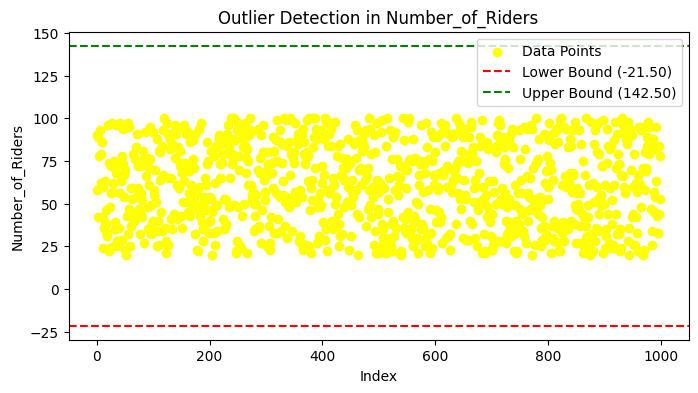

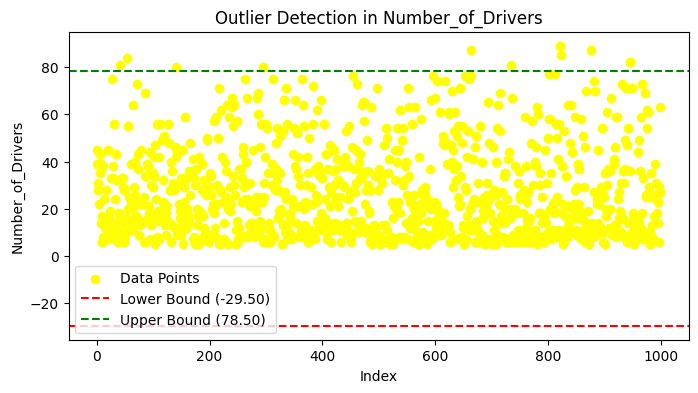

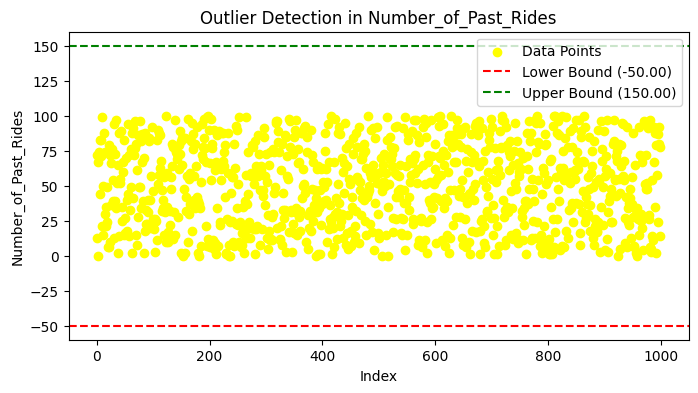

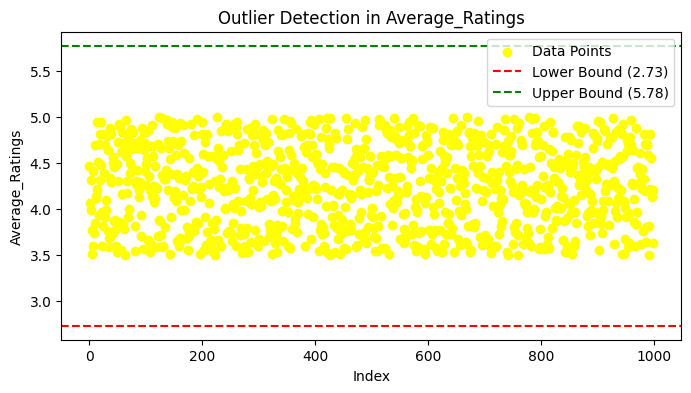

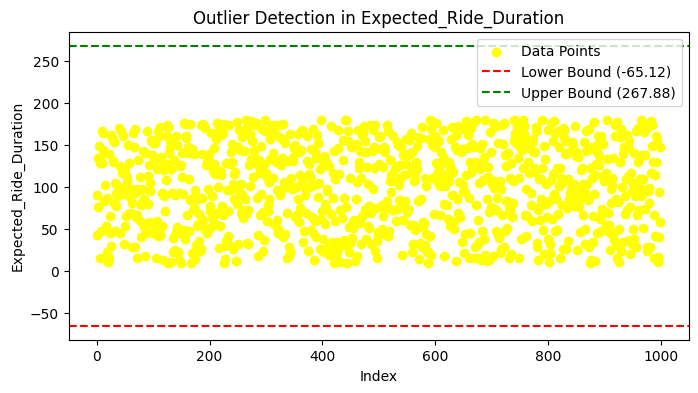

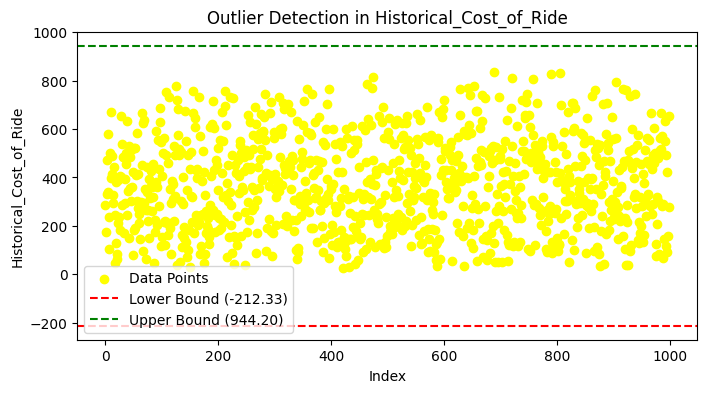

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to detect and plot outliers
def plot_outliers_with_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.scatter(data.index, data[col], color='yellow', label='Data Points')

    # Outlier bounds
    plt.axhline(y=lower, color='red', linestyle='--', label=f'Lower Bound ({lower:.2f})')
    plt.axhline(y=upper, color='green', linestyle='--', label=f'Upper Bound ({upper:.2f})')

    plt.title(f"Outlier Detection in {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.show()

# Apply to all numeric columns
for col in dataset.select_dtypes(include=np.number).columns:
    plot_outliers_with_iqr(dataset, col)


In [8]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/dynamic_pricing.csv")

#Assumptions
# Completed rides = min(Riders, Drivers)
dataset["Completed_Rides"] = dataset[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)

# Cost assumption (70% of historical cost = driver payout + fuel + fees)
dataset["Cost_per_Ride"] = 0.7 * dataset["Historical_Cost_of_Ride"]

# Recommended Price (scenario: +10% increase)
dataset["Recommended_Price"] = dataset["Historical_Cost_of_Ride"] * 1.10

# 1.Revenue
baseline_revenue = (dataset["Historical_Cost_of_Ride"] * dataset["Completed_Rides"]).sum()
recommended_revenue = (dataset["Recommended_Price"] * dataset["Completed_Rides"]).sum()
dataset["Revenue"] = dataset["Historical_Cost_of_Ride"] * dataset["Completed_Rides"]

# 2.Profit
dataset["Profit"] = (dataset["Historical_Cost_of_Ride"] - dataset["Cost_per_Ride"]) * dataset["Completed_Rides"]

# 3.Revenue Lift (%)
Revenue_lift = ((recommended_revenue - baseline_revenue) / baseline_revenue) * 100
if baseline_revenue == 0:
    Revenue_lift = np.nan

# 4.Gross Margin (%)
Gross_margin = (dataset["Profit"].sum() / baseline_revenue) * 100

# 5.Conversion Rate (%)
total_riders = dataset["Number_of_Riders"].sum()
total_completed = dataset["Completed_Rides"].sum()
Conversion_rate = (total_completed / total_riders) * 100 if total_riders > 0 else np.nan

# 6.Price Change Rate (%)
dataset["Price_Change_%"] = dataset["Historical_Cost_of_Ride"].pct_change().abs() * 100
dataset["Price_Change_%"] = dataset["Price_Change_%"].fillna(0)
Price_change_rate = dataset["Price_Change_%"].mean()

# 7.Cancellation Rate (%)
dataset["Cancellation_Rate_%"] = ((dataset["Number_of_Riders"] - dataset["Completed_Rides"]) / dataset["Number_of_Riders"]) * 100
Cancellation_rate = dataset["Cancellation_Rate_%"].mean()

results = {
    "Revenue (Baseline)": round(baseline_revenue, 2),
    "Revenue (Scenario +10% Price)": round(recommended_revenue, 2),
    "Revenue Lift %": round(Revenue_lift, 2),
    "Profit Total": round(dataset["Profit"].sum(), 2),
    "Gross Margin %": round(Gross_margin, 2),
    "Conversion Rate %": round(Conversion_rate, 2),
    "Avg Price Change %": round(Price_change_rate, 2),
    "Cancellation Rate %": round(Cancellation_rate, 2),
}
print("Aggregate KPI Summary")
for k, v in results.items():
    print(f"{k}: {v}")

Aggregate KPI Summary
Revenue (Baseline): 10146781.38
Revenue (Scenario +10% Price): 11161459.52
Revenue Lift %: 10.0
Profit Total: 3044034.41
Gross Margin %: 30.0
Conversion Rate %: 44.85
Avg Price Change %: 99.79
Cancellation Rate %: 56.18


In [ ]:
dataset.shape

(1000, 17)

In [9]:
dataset.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Completed_Rides,Cost_per_Ride,Recommended_Price,Revenue,Profit,Price_Change_%,Cancellation_Rate_%
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,45,198.980091,312.683000,12791.577286,3837.473186,0.000000,50.000000
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,39,121.712327,191.262228,6781.115357,2034.334607,38.831907,32.758621
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,31,230.856828,362.775016,10223.659538,3067.097861,89.674156,26.190476
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,28,329.140862,517.221355,13165.634489,3949.690347,42.573588,68.539326
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,22,405.776996,637.649565,12752.991292,3825.897388,23.283689,71.794872


In [10]:
# --- Feature Engineering ---
import numpy as np
import pandas as pd

# 1. Supply, Demand, and Inventory Ratios
dataset['Rider_Driver_Ratio'] = dataset['Number_of_Riders'] / dataset['Number_of_Drivers']
dataset['Driver_to_Rider_Ratio'] = dataset['Number_of_Drivers'] / dataset['Number_of_Riders']
dataset['Supply_Tightness'] = dataset['Number_of_Riders'] / dataset['Number_of_Drivers']
dataset['Inventory_Health_Index'] = dataset['Number_of_Drivers'] / dataset['Number_of_Riders']

# 2. Probability of Ride Completion (p_complete)
dataset['p_complete'] = np.minimum(1.0, dataset['Driver_to_Rider_Ratio'])

# 3. Cost per Minute
dataset['Cost_per_Min'] = dataset['Historical_Cost_of_Ride'] / dataset['Expected_Ride_Duration']

# 4. Numerical Feature Mapping
# Loyalty Score based on customer status
loyalty_mapping = {'Gold': 3, 'Silver': 2, 'Regular': 1}
dataset['Loyalty_Score'] = dataset['Customer_Loyalty_Status'].map(loyalty_mapping)

# Vehicle Factor based on vehicle type
vehicle_mapping = {'Premium': 1.5, 'Economy': 1.0}
dataset['Vehicle_Factor'] = dataset['Vehicle_Type'].map(vehicle_mapping)

# 5. Peak Time Indicator
peak_times = ['Evening', 'Night']
dataset['Peak'] = dataset['Time_of_Booking'].apply(lambda x: 1 if x in peak_times else 0)

# 6. Competitor Pricing
np.random.seed(42)
random_factor = np.random.uniform(0.9, 1.1, size=len(dataset))
dataset['competitor_price'] = dataset['Historical_Cost_of_Ride'] * random_factor

# Competitor Price Index
dataset['Competitor_Price_Index'] = dataset['Historical_Cost_of_Ride'] / dataset['competitor_price']

# 7. Baseline Price and Target Variable
dataset['baseline_price'] = dataset['Historical_Cost_of_Ride']
dataset['price'] = dataset['Historical_Cost_of_Ride']

print("DataFrame with Engineered Features:")
display(dataset[['Rider_Driver_Ratio','Driver_to_Rider_Ratio','Inventory_Health_Index', 'Loyalty_Score', 'Cost_per_Min', 'Peak','Supply_Tightness', 'Vehicle_Factor','baseline_price','competitor_price','Competitor_Price_Index','p_complete', 'price']].head())

DataFrame with Engineered Features:


,Rider_Driver_Ratio,Driver_to_Rider_Ratio,Inventory_Health_Index,Loyalty_Score,Cost_per_Min,Peak,Supply_Tightness,Vehicle_Factor,baseline_price,competitor_price,Competitor_Price_Index,p_complete,price
0,2.000000,0.500000,0.500000,2,3.158414,1,2.000000,1.5,284.257273,277.124696,1.025738,0.500000,284.257273
1,1.487179,0.672414,0.672414,2,4.043599,1,1.487179,1.0,173.874753,189.548320,0.917311,0.672414,173.874753
2,1.354839,0.738095,0.738095,2,4.339414,0,1.354839,1.5,329.795469,345.097579,0.955659,0.738095,329.795469
3,3.178571,0.314607,0.314607,1,3.508964,0,3.178571,1.5,470.201232,479.479100,0.980650,0.314607,470.201232
4,3.545455,0.282051,0.282051,1,3.890479,0,3.545455,1.0,579.681422,539.801502,1.073879,0.282051,579.681422


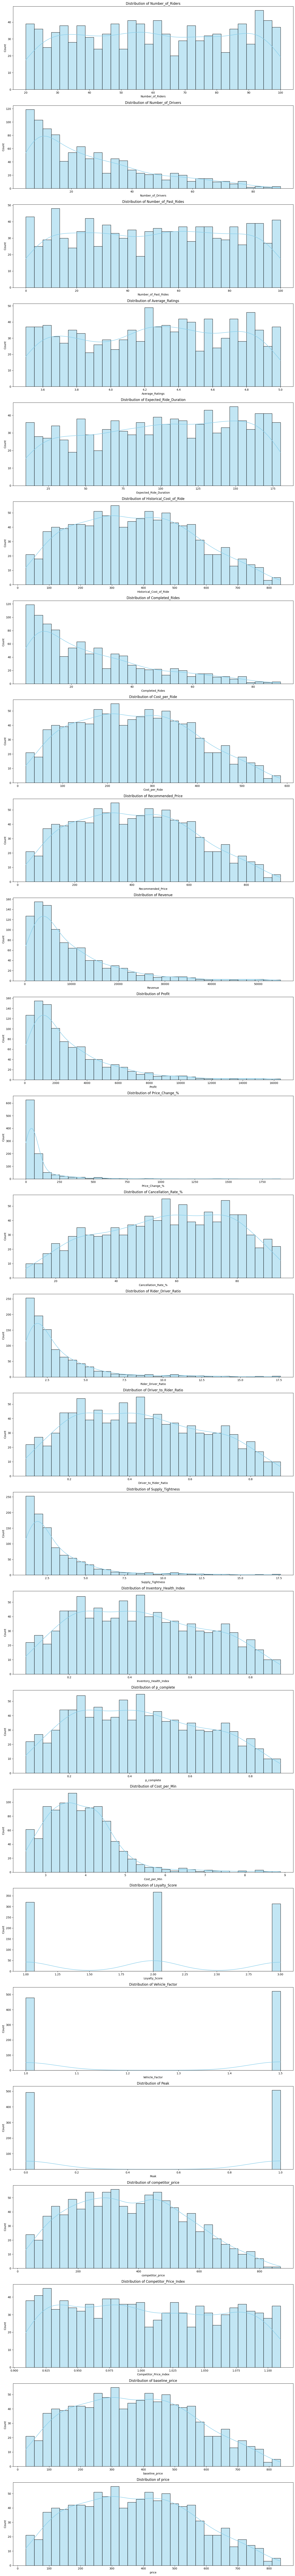

In [11]:
#Numeric Distributions
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = dataset.select_dtypes(include='number').columns
plt.figure(figsize=(15, 5 * len(num_cols)))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

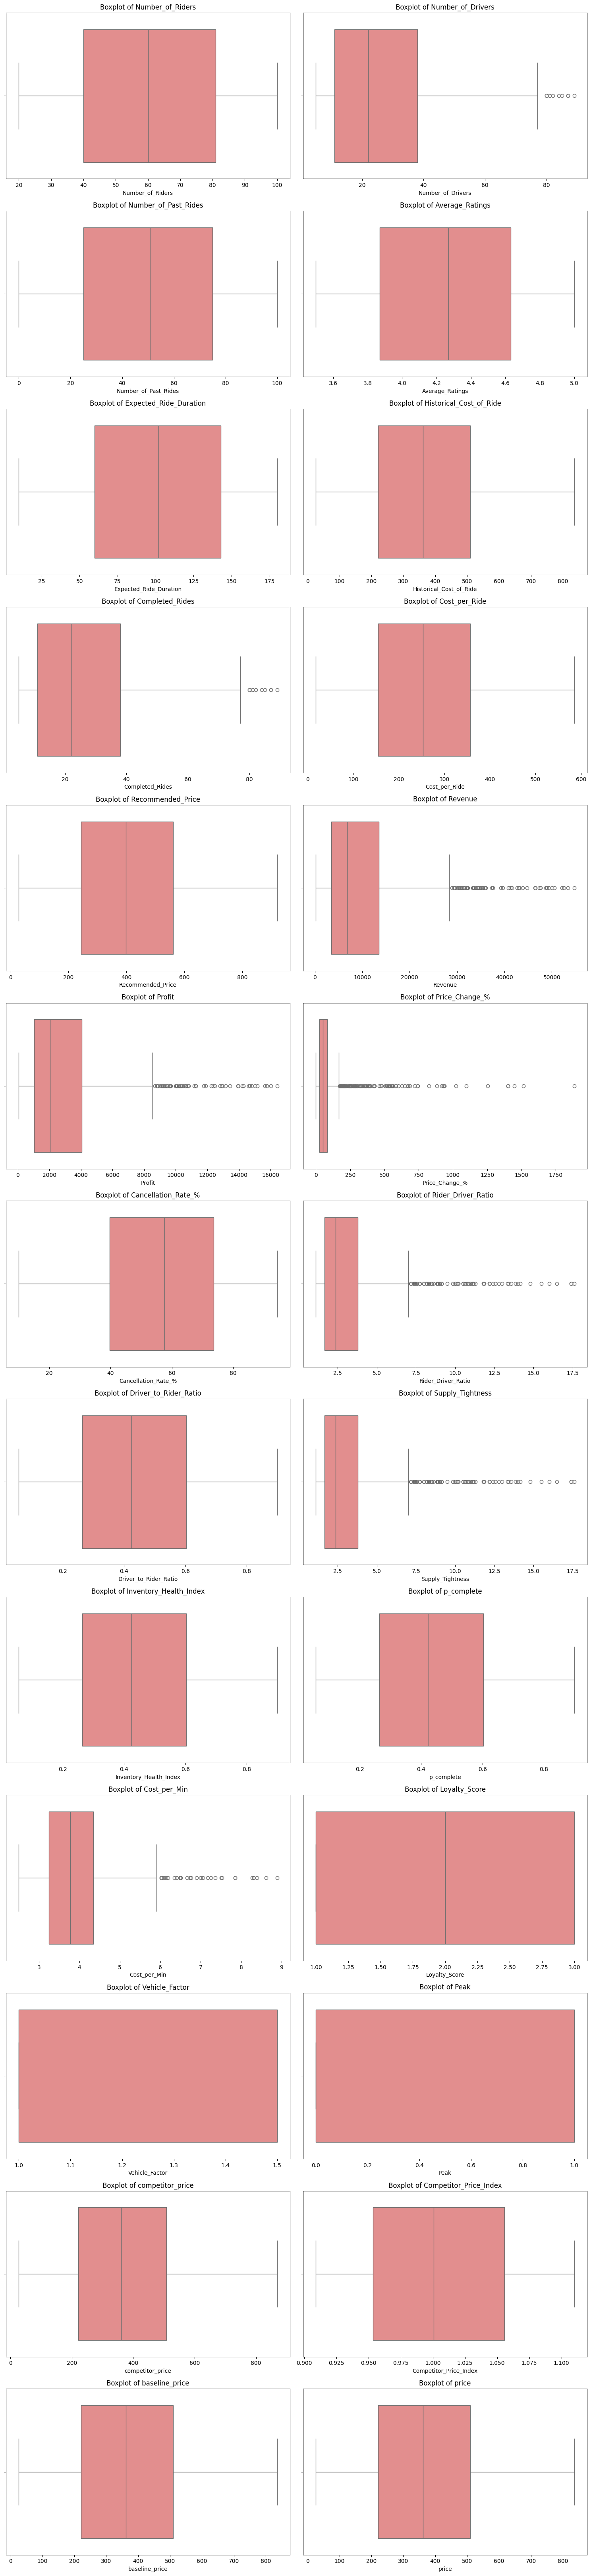

In [12]:
# Boxplots for Outlier View (clean layout - 2 per row)
plt.figure(figsize=(15, 5 * ((len(num_cols)+1)//2)))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)+1)//2, 2, i)  # 2 plots per row
    sns.boxplot(x=dataset[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


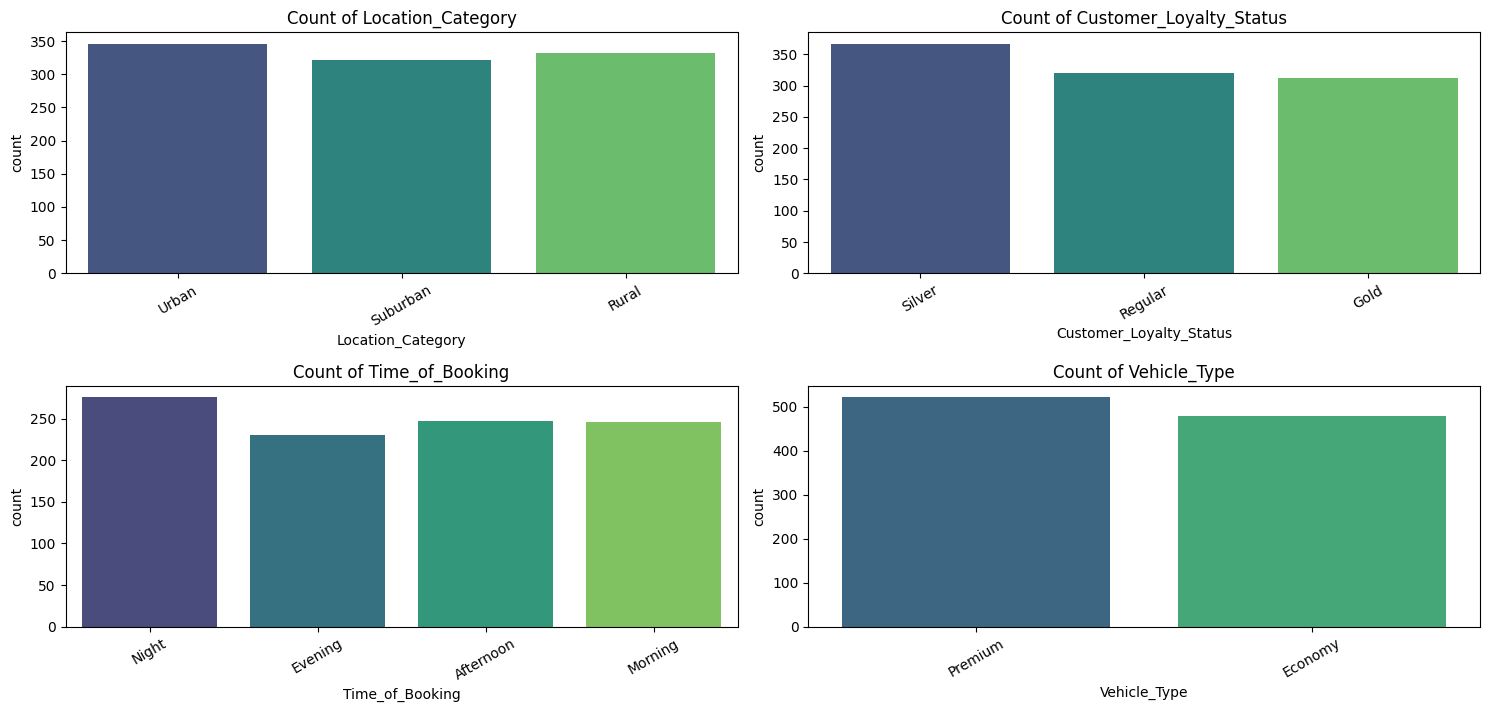

In [13]:
#Categorical Counts
cat_cols = dataset.select_dtypes(exclude=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2 + 1, 2, i)
    sns.countplot(data=dataset, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


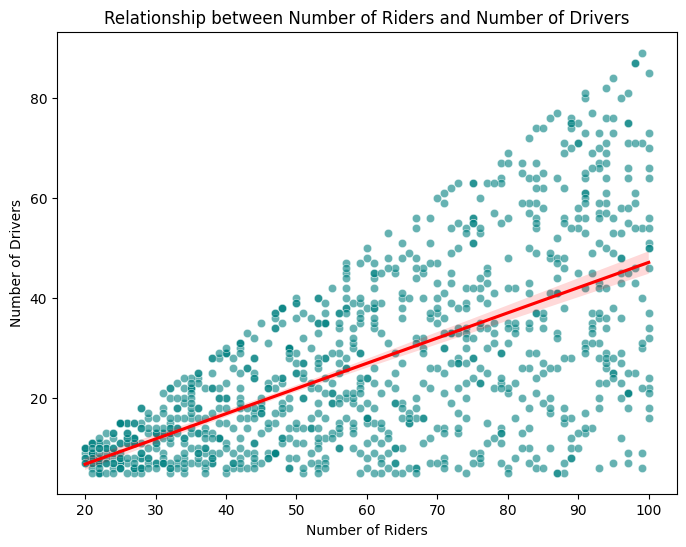

In [14]:
# Relationship between Number of Riders and Number of Drivers
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=dataset,
    x="Number_of_Riders",
    y="Number_of_Drivers",
    alpha=0.6,
    color="teal"
)
sns.regplot(
    data=dataset,
    x="Number_of_Riders",
    y="Number_of_Drivers",
    scatter=False,
    color="red"
)
plt.title("Relationship between Number of Riders and Number of Drivers")
plt.xlabel("Number of Riders")
plt.ylabel("Number of Drivers")
plt.show()

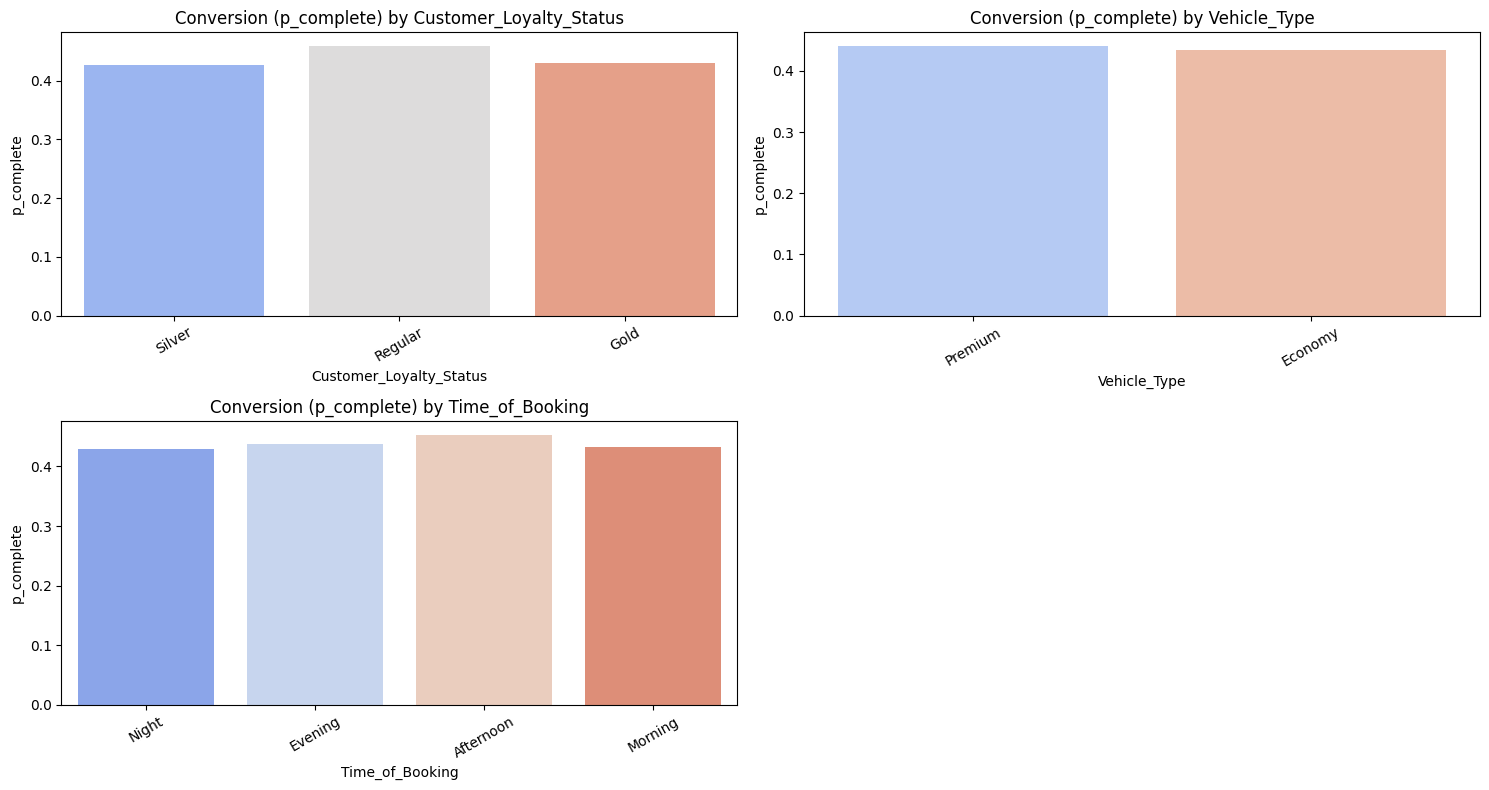

In [15]:
#Conversion by Segments (using p_complete)
plt.figure(figsize=(15, 8))

for i, col in enumerate(['Customer_Loyalty_Status','Vehicle_Type','Time_of_Booking'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(
        x=col,
        y='p_complete',
        data=dataset,
        hue=col,
        palette='coolwarm',
        legend=False,
        errorbar=None
    )
    plt.title(f"Conversion (p_complete) by {col}")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

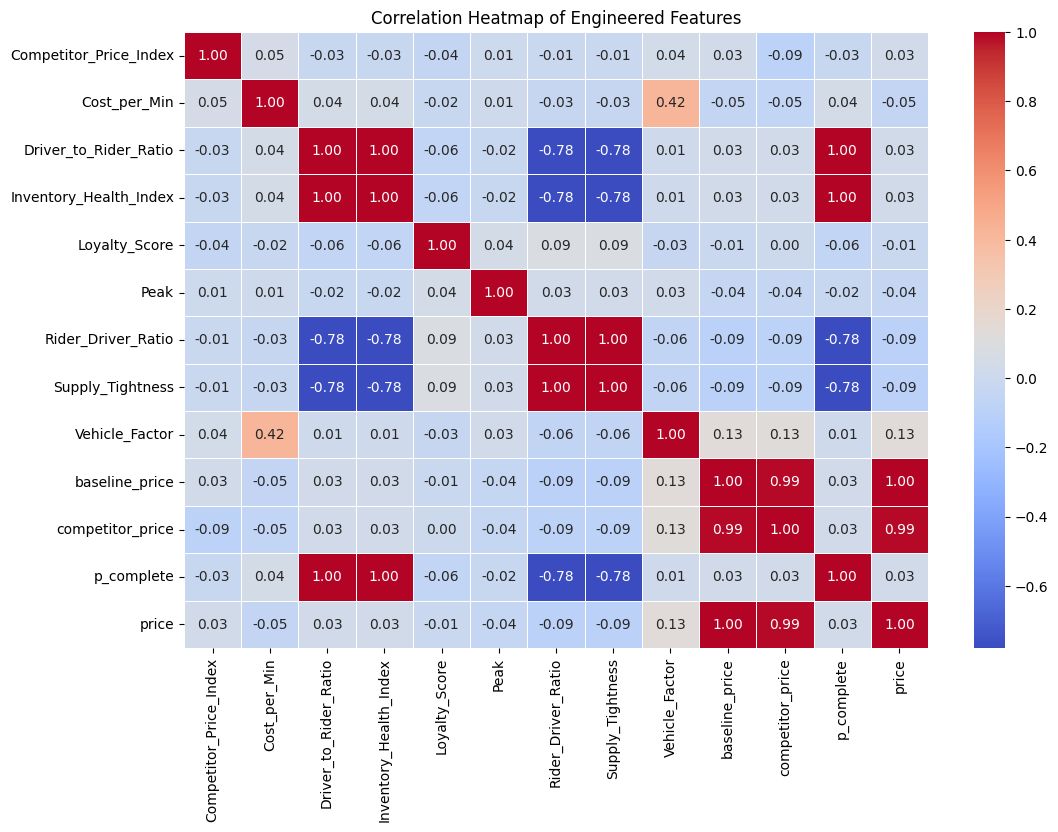

In [16]:
#Correlation Heatmap (Key Engineered Features)
plt.figure(figsize=(12, 8))
engineered_cols = [
    'Competitor_Price_Index','Cost_per_Min','Driver_to_Rider_Ratio',
    'Inventory_Health_Index','Loyalty_Score','Peak','Rider_Driver_Ratio',
    'Supply_Tightness','Vehicle_Factor','baseline_price','competitor_price',
    'p_complete','price'
]
corr = dataset[engineered_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features")
plt.show()

Seasonality Analysis


,mean_conv,mean_price,total_intents
Time_of_Booking,,,
Afternoon,0.453331,380.818228,14708
Evening,0.438182,364.253957,13980
Morning,0.433191,378.062094,14675
Night,0.429000,367.009354,17009


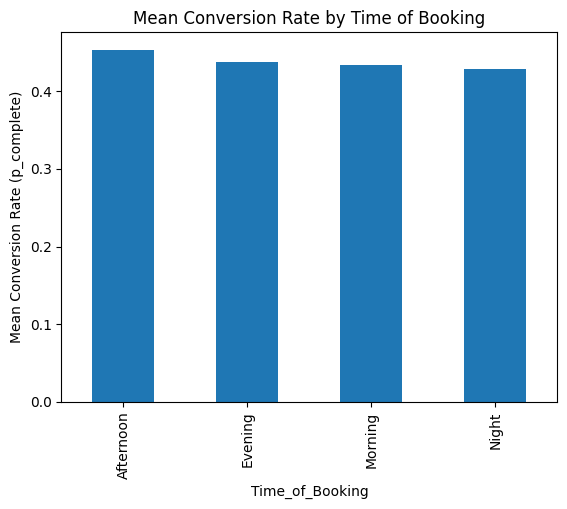


Competitor Pressure Analysis


,avg_gap_pct,mean_comp_price,mean_our_price
Vehicle_Type,,,
Economy,0.310246,346.158886,346.573399
Premium,0.749604,394.625299,396.246242


Inventory Health Analysis


,mean_conv,mean_price,count
Inventory_Band,,,
Very Tight,0.301394,372.316582,628
Tight,0.644676,377.346561,327
Balanced,0.846160,339.899649,45


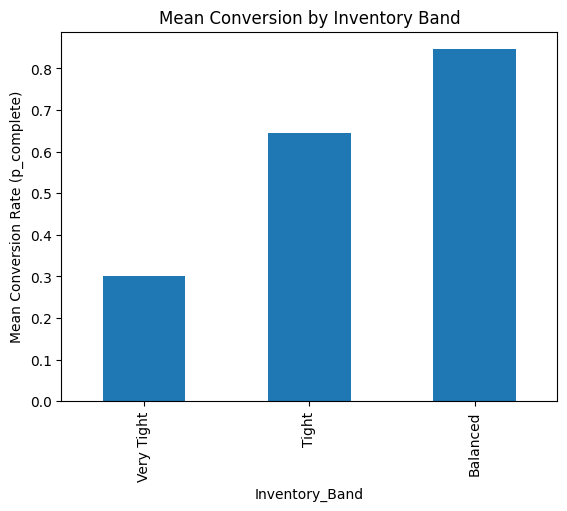


Customer Segmentation Profile


,mean_conv,mean_price,mean_cost,mean_loyalty,mean_ratio,count
segment_k4,,,,,,
0,0.644015,407.232356,407.232356,1.915789,1.605809,380
2,0.469711,202.494455,202.494455,1.823529,2.465342,136
1,0.296484,410.031866,410.031866,2.075061,3.718234,413
3,0.100106,293.970723,293.970723,2.253521,10.624459,71


In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 5.1 Seasonality: Conversion & Price by Time Buckets
seasonality = (
    dataset.groupby("Time_of_Booking")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            total_intents=("Number_of_Riders", "sum")
        )
        .sort_values("mean_conv", ascending=False)
)
print("Seasonality Analysis")
display(seasonality)
# Plotting conversion rate by time of day
seasonality["mean_conv"].plot(kind="bar", title="Mean Conversion Rate by Time of Booking")
plt.ylabel("Mean Conversion Rate (p_complete)")
plt.show()

# 5.2 Competitor Pressure: Price Gap & Index
dataset["Competitor_Gap_pct"] = (dataset["price"] - dataset["competitor_price"]) / dataset["competitor_price"] * 100.0
comp_pressure = (
    dataset.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct", "mean"),
            mean_comp_price=("competitor_price", "mean"),
            mean_our_price=("price", "mean"),
        )
        .sort_values("avg_gap_pct")
)
print("\nCompetitor Pressure Analysis")
display(comp_pressure)

# 5.3 Inventory Health Bands & Conversion
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]

dataset["Inventory_Band"] = pd.cut(dataset["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True)

inv_summary = dataset.groupby("Inventory_Band", observed=True).agg(
    mean_conv=("p_complete", "mean"),
    mean_price=("price", "mean"),
    count=("Inventory_Band", "size")
)
print("Inventory Health Analysis")
display(inv_summary)
# Plotting conversion rate by inventory band
inv_summary["mean_conv"].plot(kind="bar", title="Mean Conversion by Inventory Band")
plt.ylabel("Mean Conversion Rate (p_complete)")
plt.show()

# 6. Customer Segmentation (KMeans)
seg_features = [
    "Loyalty_Score", "Rider_Driver_Ratio", "Driver_to_Rider_Ratio",
    "Supply_Tightness", "Cost_per_Min", "Inventory_Health_Index",
    "Expected_Ride_Duration"
]
X = dataset[seg_features].copy().fillna(dataset[seg_features].median())
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
dataset["segment_k4"] = kmeans.fit_predict(Xs)

seg_profile = (
    dataset.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            mean_cost=("Historical_Cost_of_Ride", "mean"),
            mean_loyalty=("Loyalty_Score", "mean"),
            mean_ratio=("Rider_Driver_Ratio", "mean"),
            count=("segment_k4", "size")
        )
        .sort_values("mean_conv", ascending=False)
)
print("\nCustomer Segmentation Profile")
display(seg_profile)

In [ ]:
dataset.shape

(1000, 33)

In [18]:
dataset.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Loyalty_Score,Vehicle_Factor,Peak,competitor_price,Competitor_Price_Index,baseline_price,price,Competitor_Gap_pct,Inventory_Band,segment_k4
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,2,1.5,1,277.124696,1.025738,284.257273,284.257273,2.573779,Very Tight,0
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,2,1.0,1,189.548320,0.917311,173.874753,173.874753,-8.268904,Tight,0
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,2,1.5,0,345.097579,0.955659,329.795469,329.795469,-4.434140,Tight,0
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,1,1.5,0,479.479100,0.980650,470.201232,470.201232,-1.934989,Very Tight,1
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,1,1.0,0,539.801502,1.073879,579.681422,579.681422,7.387886,Very Tight,1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

#Baseline Pricing Engine
# --- Prerequisite: Create Inventory Health Bands ---
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]
dataset["Inventory_Band"] = pd.cut(dataset["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True)

def get_baseline_price_recommendation(row):
    peak_times = ['Evening', 'Night', 'Morning']
    time_of_day = row['Time_of_Booking']

    if time_of_day in peak_times:
        base_price = row['Historical_Cost_of_Ride']

        if time_of_day in ['Evening', 'Night']:
            base_price *= 1.15
        elif time_of_day == 'Morning':
            base_price *= 1.10

        inventory_band = row['Inventory_Band']
        if inventory_band == 'Very Tight':
            base_price *= 1.20
        elif inventory_band == 'Tight':
            base_price *= 1.10
        elif inventory_band == 'Loose':
            base_price *= 0.90

        return base_price
    else:
        return row['Historical_Cost_of_Ride']

STABILITY_PERCENT = 0.15
MIN_GROSS_MARGIN_PERCENT = 0.12

def audit_policy_rules(df_original, df_scenario):
    print("\n--- Policy Audit Results ---")
    audit_df = df_scenario.copy()

    cost = audit_df['Historical_Cost_of_Ride'] * 0.7
    audit_df['gm_baseline'] = (audit_df['Historical_Cost_of_Ride'] - cost) / audit_df['Historical_Cost_of_Ride']
    audit_df['gm_scenario'] = (audit_df['baseline_recommended_price'] - cost) / audit_df['baseline_recommended_price']

    rules = {
        'stab_ok': audit_df['baseline_recommended_price'].between(
            audit_df['Historical_Cost_of_Ride'] * (1 - STABILITY_PERCENT),
            audit_df['Historical_Cost_of_Ride'] * (1 + STABILITY_PERCENT)
        ),
        'gm12_ok': audit_df['gm_scenario'] >= MIN_GROSS_MARGIN_PERCENT,
        'gm_base_ok': audit_df['gm_scenario'] >= audit_df['gm_baseline'],
        'cancel_ok': audit_df['p_complete'] >= df_original['p_complete'] # Checks if p_complete decreased
    }

    for rule_name, result_series in rules.items():
        print(f"{rule_name.replace('_', ' ').title()}: {result_series.all()}")
        audit_df[rule_name] = result_series

    audit_df['all_ok'] = audit_df[rules.keys()].all(axis=1)
    violating_rows = audit_df[~audit_df['all_ok']]

    if not violating_rows.empty:
        print(f"\nFound {len(violating_rows)} violating rows (showing up to 10):")
        display(violating_rows[['stab_ok', 'gm12_ok', 'gm_base_ok', 'cancel_ok', 'all_ok']].head(10))
    else:
        print("\nNo policy violations found.")
    return

def evaluate_performance(df_original, df_scenario):
    results = {}
    for name, df in [('Baseline', df_original), ('Scenario', df_scenario)]:
        # Use a consistent price column name for calculation
        price_col = 'Historical_Cost_of_Ride' if name == 'Baseline' else 'baseline_recommended_price'
        bookings = df['Number_of_Riders']
        revenue = (df[price_col] * bookings).sum()
        cost = (df['Historical_Cost_of_Ride'] * 0.7 * bookings).sum()
        profit = revenue - cost
        results[f'Revenue ({name})'] = revenue
        results[f'Gross Margin ({name}) %'] = (profit / revenue) * 100 if revenue else 0
        results[f'Cancellation Rate ({name}) %'] = 100 - (df['p_complete'] * 100).mean() # Based on p_complete

    results['Revenue Lift (%)'] = (results['Revenue (Scenario)'] - results['Revenue (Baseline)']) / results['Revenue (Baseline)'] * 100

    print("\n--- FINAL KPIs (Scenario vs Baseline) ---")
    for key, value in results.items():
        print(f"{key}: {value:,.2f}")
    return

# Main Execution and Analysis
dataset['baseline_recommended_price'] = dataset.apply(get_baseline_price_recommendation, axis=1)

df_scenario = dataset.copy()
df_scenario['price'] = df_scenario['baseline_recommended_price']

evaluate_performance(dataset, df_scenario)

audit_policy_rules(dataset, df_scenario)

print("\nSample (top 10) of baseline vs recommended:")
comparison_sample = dataset[[
    'Vehicle_Type', 'Time_of_Booking', 'Location_Category', 'Customer_Loyalty_Status',
    'Number_of_Riders', 'Number_of_Drivers', 'Driver_to_Rider_Ratio', 'Historical_Cost_of_Ride',
    'baseline_recommended_price'
]].copy()
display(comparison_sample.head(10))


--- FINAL KPIs (Scenario vs Baseline) ---
Revenue (Baseline): 22,514,545.02
Gross Margin (Baseline) %: 30.00
Cancellation Rate (Baseline) %: 56.18
Revenue (Scenario): 27,788,609.78
Gross Margin (Scenario) %: 43.29
Cancellation Rate (Scenario) %: 56.18
Revenue Lift (%): 23.43

--- Policy Audit Results ---
Stab Ok: False
Gm12 Ok: True
Gm Base Ok: True
Cancel Ok: True

Found 724 violating rows (showing up to 10):


,stab_ok,gm12_ok,gm_base_ok,cancel_ok,all_ok
0,False,True,True,True,False
1,False,True,True,True,False
5,False,True,True,True,False
8,False,True,True,True,False
9,False,True,True,True,False
10,False,True,True,True,False
11,False,True,True,True,False
12,False,True,True,True,False
13,False,True,True,True,False
18,False,True,True,True,False



Sample (top 10) of baseline vs recommended:


,Vehicle_Type,Time_of_Booking,Location_Category,Customer_Loyalty_Status,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,baseline_recommended_price
0,Premium,Night,Urban,Silver,90,45,0.500000,284.257273,392.275037
1,Economy,Evening,Suburban,Silver,58,39,0.672414,173.874753,219.951562
2,Premium,Afternoon,Rural,Silver,42,31,0.738095,329.795469,329.795469
3,Premium,Afternoon,Rural,Regular,89,28,0.314607,470.201232,470.201232
4,Economy,Afternoon,Rural,Regular,78,22,0.282051,579.681422,579.681422
5,Economy,Night,Urban,Silver,59,35,0.593220,339.955361,430.043531
6,Premium,Afternoon,Suburban,Regular,93,43,0.462366,104.061541,104.061541
7,Premium,Afternoon,Rural,Gold,62,39,0.629032,235.811864,235.811864
8,Economy,Evening,Rural,Silver,79,14,0.177215,501.412517,691.949274
9,Premium,Night,Rural,Silver,42,6,0.142857,398.993365,550.610843
